In [1]:
# Récupération des packages utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from dython.nominal import associations

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Lecture de la base de données
df = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
print(df)

      OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel    

In [4]:
# Un gros outlier apparait plus tard (non estampillé), mais c'est un campus, ce n'est donc pas une valeur aberrante
df.loc[df['TotalGHGEmissions'] >= 15000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2979090.0,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09


In [5]:
df.shape

(3376, 46)

In [6]:
df.columns.values

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       '

<AxesSubplot:>

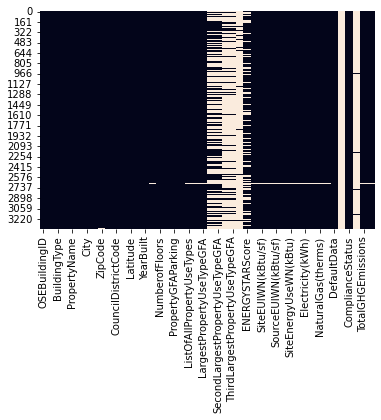

In [7]:
#HeatMap des valeurs manquantes dans le jeu de données
sns.heatmap(df.isnull(), cbar= False)

In [8]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

C:\Users\alexa\AppData\Local\Temp/ipykernel_71156/125353452.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = True)


In [9]:
df['DataYear'].value_counts()

2016    3376
Name: DataYear, dtype: int64

In [10]:
df['Outlier'].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [11]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [12]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [13]:
df.loc[df.NumberofFloors == 99,'NumberofFloors'] = 2

In [14]:
df.loc[1359]

OSEBuildingID                                               21611
DataYear                                                     2016
BuildingType                                       NonResidential
PrimaryPropertyType                              Worship Facility
PropertyName                       Seattle Chinese Baptist Church
Address                                  5801 Beacon Avenue South
City                                                      Seattle
State                                                          WA
ZipCode                                                   98108.0
TaxParcelIdentificationNumber                          2124049098
CouncilDistrictCode                                             2
Neighborhood                                     GREATER DUWAMISH
Latitude                                                 47.55072
Longitude                                              -122.30265
YearBuilt                                                    1977
NumberofBu

In [15]:
df['YearsENERGYSTARCertified'].value_counts()

2016                                                            14
20172016                                                         8
2017                                                             7
20162015                                                         6
2014                                                             6
2013                                                             4
2009                                                             4
20172015                                                         3
201620152014                                                     3
20152014                                                         3
2010                                                             2
201720162015                                                     2
20112009                                                         2
2015                                                             2
20092005                                                      

In [16]:
df.loc[df['NumberofBuildings']==111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


In [17]:
df['NumberofBuildings'].value_counts()

1.0      3175
0.0        92
2.0        37
3.0        22
4.0        12
5.0        10
6.0         5
8.0         3
10.0        2
14.0        2
9.0         2
7.0         1
11.0        1
16.0        1
23.0        1
27.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

In [18]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [19]:
#Nombre de valeurs manquantes dans le dataframe
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


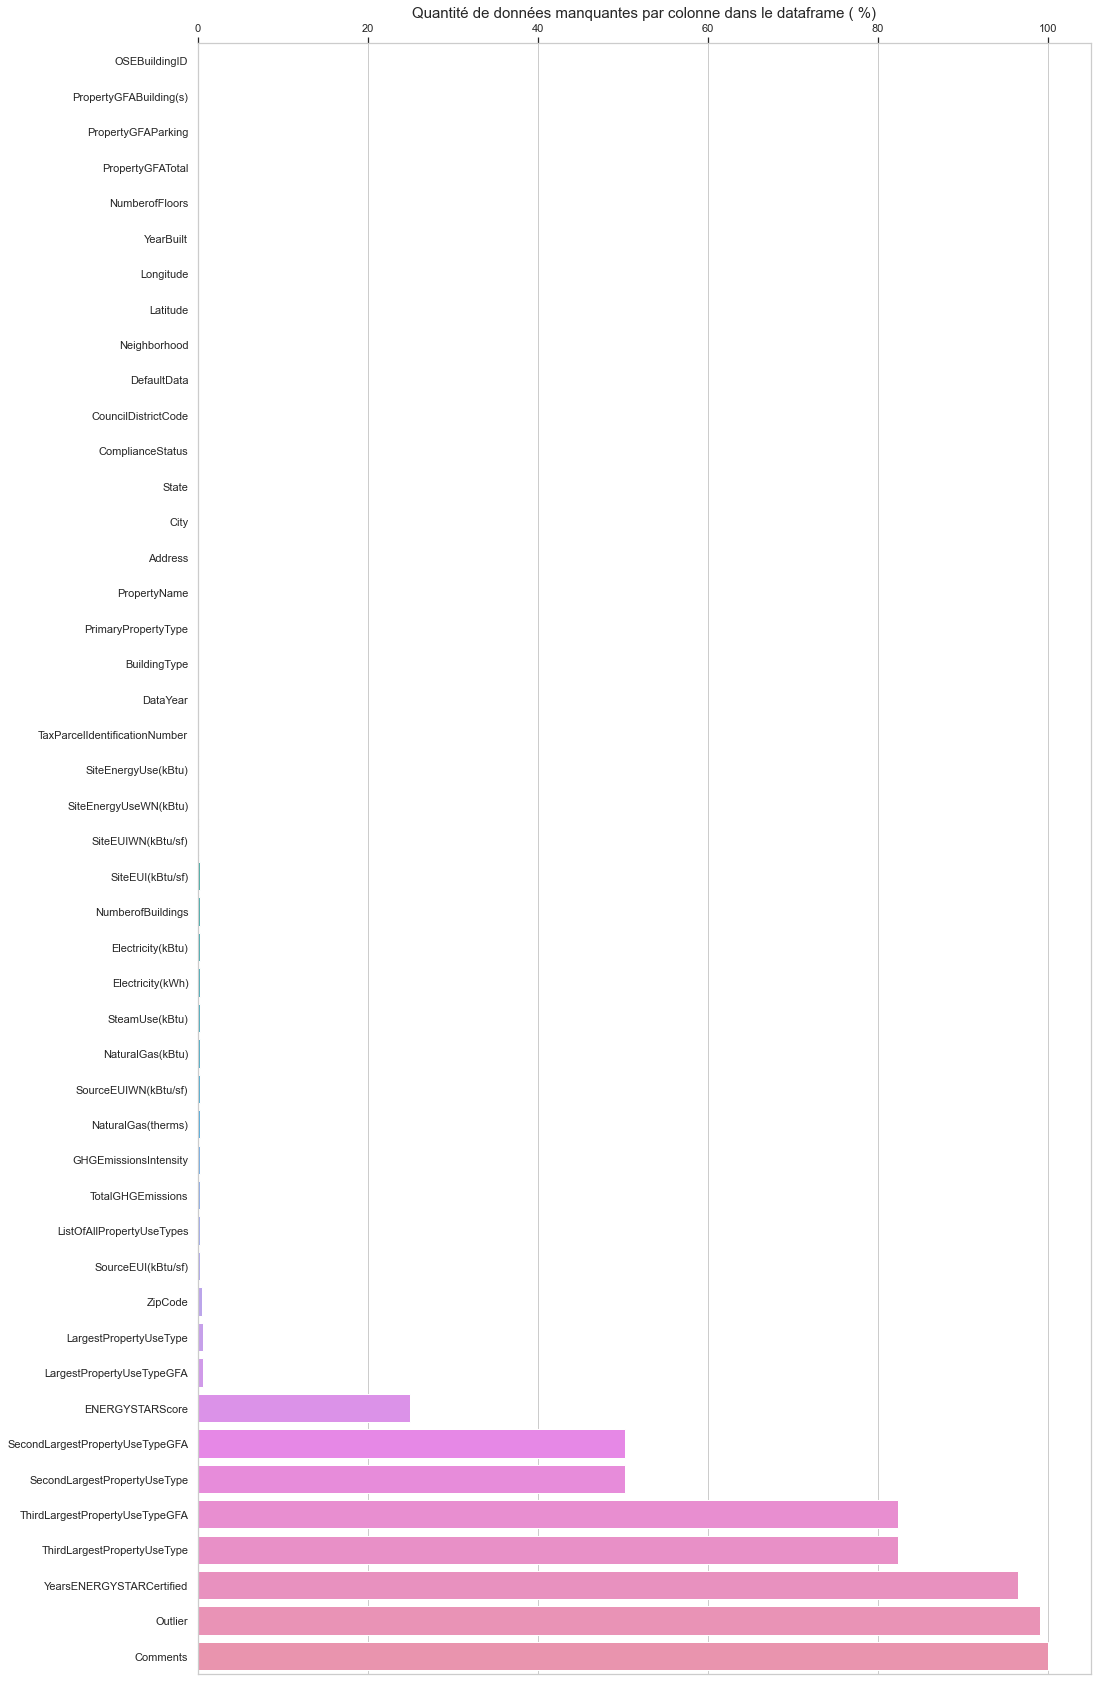

In [20]:
#Visualisation sous forme de diagramme baton des données manquantes par colonne
def proportion_missing_values(dataframe):
        miss = dataframe.isna().sum().divide(dataframe.shape[0]/100).sort_values(ascending=True)
        return miss

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_missing_values(df).index, x=proportion_missing_values(df).values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le dataframe ( %)', size=15)
plt.show()

### Détection des doublons

In [21]:
# On regarde les doublons vis-à-vis de la variable 'code' que l'on doit détecter.

def detect_doublons(dataframe, subset):
    doublons = dataframe.duplicated(subset = subset, keep = False)
       
    if True in list(doublons.unique()):
            result = len(dataframe[doublons])
            print("Il y a {} doublons".format(result))
            return result

    else:
        print("Il n'y a pas de doublons")
        return 0

In [22]:
detect_doublons(df, 'OSEBuildingID')

Il n'y a pas de doublons


0

### Matrice de corrélation

In [23]:
df.corr()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,NaN,0.084625,-0.089295,0.092736,0.040473,0.177302,0.025608,-0.108466,-0.136508,-0.213901,-0.110409,-0.106054,-0.192988,-0.174970,0.076736,-0.126495,-0.125784,-0.149676,-0.148555,-0.118090,-0.203420,-0.033588,-0.130168,-0.130168,-0.085620,-0.085620,-0.067432,NaN,-0.100458,-0.034985
DataYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,0.084625,NaN,1.000000,-0.063154,0.030536,-0.120893,0.094818,-0.009582,-0.120584,-0.052669,-0.076657,-0.043509,-0.036931,-0.059226,-0.037778,0.002822,-0.070757,-0.076659,-0.050815,-0.055920,-0.041811,-0.050046,-0.038624,-0.036909,-0.036909,-0.028650,-0.028650,0.016678,NaN,-0.047686,-0.083394
CouncilDistrictCode,-0.089295,NaN,-0.063154,1.000000,0.489348,-0.265482,-0.020560,-0.013174,0.267496,0.098110,0.133227,0.082540,0.067790,0.141919,0.017799,0.059524,0.052058,0.046414,0.066462,0.063379,0.040391,0.056832,0.007771,0.056176,0.056176,0.003467,0.003467,-0.084379,NaN,0.017442,0.003274
Latitude,0.092736,NaN,0.030536,0.489348,1.000000,0.005250,0.117239,0.020646,-0.016695,-0.018162,-0.001167,-0.018932,-0.015277,-0.052773,-0.107349,0.079948,-0.012730,-0.016918,-0.001273,-0.002326,-0.021314,-0.041985,-0.015448,-0.018924,-0.018924,-0.020860,-0.020860,-0.047652,NaN,-0.026089,-0.040727
Longitude,0.040473,NaN,-0.120893,-0.265482,0.005250,1.000000,-0.051111,0.017858,-0.033740,0.025383,-0.003374,0.027237,0.029323,0.018545,0.027265,-0.026404,0.027695,0.027467,0.019153,0.018590,0.033803,0.032156,0.018502,0.026537,0.026537,0.033180,0.033180,0.077219,NaN,0.037411,0.039365
YearBuilt,0.177302,NaN,0.094818,-0.020560,0.117239,-0.051111,1.000000,-0.023712,0.151645,0.100417,0.183176,0.077203,0.070187,0.197447,0.091195,0.028813,-0.019642,-0.030900,0.043394,0.039066,0.027251,0.069277,-0.018234,0.039849,0.039849,0.023275,0.023275,0.001704,NaN,0.012831,-0.146212
NumberofBuildings,0.025608,NaN,-0.009582,-0.013174,0.020646,0.017858,-0.023712,1.000000,-0.027340,0.693412,-0.004774,0.730487,0.758749,0.112821,0.000981,-0.004900,0.033003,0.007034,0.031599,0.003896,0.690712,0.090486,0.397588,0.735028,0.735028,0.062324,0.062324,-0.010229,NaN,0.405261,0.027564
NumberofFloors,-0.108466,NaN,-0.120584,0.267496,-0.016695,-0.033740,0.151645,-0.027340,1.000000,0.421009,0.441474,0.374441,0.356653,0.469908,0.223787,0.021752,0.013668,0.003143,0.042888,0.036739,0.216763,0.308483,0.083594,0.264506,0.264506,0.069390,0.069390,-0.076209,NaN,0.143560,-0.041188
PropertyGFATotal,-0.136508,NaN,-0.052669,0.098110,-0.018162,0.025383,0.100417,0.693412,0.421009,1.000000,0.402580,0.989823,0.974113,0.807411,0.519872,0.067342,0.071020,0.040080,0.083315,0.054662,0.796781,0.400813,0.440568,0.849576,0.849576,0.183408,0.183408,-0.018976,NaN,0.531436,0.020105


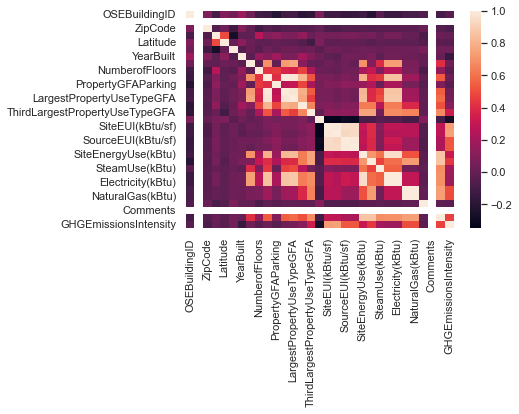

In [24]:
#Visualisation des corrélations par une HeatMap
sns.heatmap(df.corr());

On remarque que nos targets sont très corrélées aux données de relevés, que nous excluerons de notre modèle.

## Suppression des outliers étiquettés


In [25]:
df['Outlier'].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [26]:
df.loc[df.Outlier == 'Low outlier'].index

Int64Index([ 384,  448,  720,  834,  839,  962, 1045, 1229, 1295, 1341, 1611,
            1888, 1945, 2129, 2189, 2216, 2353, 2410, 2450, 2476, 2801, 3152,
            3341],
           dtype='int64')

In [27]:
list_1= list(df.loc[df.Outlier == 'Low outlier'].index.values)
list_2 = list(df.loc[df.Outlier == 'High outlier'].index.values)

In [28]:
df = df.drop(list_1)
df = df.drop(list_2)

In [29]:
df.shape

(3344, 46)

## Isolement des bâtiments non-destinés à l'habitation

In [30]:
df['BuildingType'].value_counts()

NonResidential          1445
Multifamily LR (1-4)    1006
Multifamily MR (5-9)     578
Multifamily HR (10+)     109
SPS-District K-12         97
Nonresidential COS        84
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [31]:
list_3 = list(df.loc[df.BuildingType == 'Multifamily LR (1-4)'].index.values)
list_4 = list(df.loc[df.BuildingType == 'Multifamily MR (5-9)'].index.values)
list_5 = list(df.loc[df.BuildingType == 'Multifamily HR (10+)'].index.values)

In [32]:
df = df.drop(list_3)
df = df.drop(list_4)
df = df.drop(list_5)

In [33]:
df.shape

(1651, 46)

## Traitement de quelques variables intéressantes

In [34]:
df['Neighborhood'].value_counts()

DOWNTOWN                  356
GREATER DUWAMISH          342
MAGNOLIA / QUEEN ANNE     149
LAKE UNION                148
NORTHEAST                 126
EAST                      120
NORTHWEST                  81
BALLARD                    64
NORTH                      58
CENTRAL                    49
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  40
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [35]:
df["Neighborhood"] = df["Neighborhood"].str.lower()

In [36]:
df['Neighborhood'].value_counts()

downtown                  356
greater duwamish          342
magnolia / queen anne     149
lake union                148
northeast                 126
east                      120
northwest                  86
ballard                    70
north                      67
central                    54
southeast                  46
delridge                   46
southwest                  40
delridge neighborhoods      1
Name: Neighborhood, dtype: int64

In [37]:
df.loc[df.Neighborhood == 'delridge neighborhoods']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,1,delridge neighborhoods,47.54067,-122.37441,1982,1.0,1,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,56.200001,126.0,136.600006,932082.125,1025432.125,0.0,185334.7031,632362.0071,2997.199951,299719.9951,False,NaN,Compliant,NaN,20.33,1.11


In [38]:
df['Neighborhood'] = df['Neighborhood'].str.replace('delridge neighborhoods', 'delridge')

In [39]:
df['Neighborhood'].value_counts()

downtown                 356
greater duwamish         342
magnolia / queen anne    149
lake union               148
northeast                126
east                     120
northwest                 86
ballard                   70
north                     67
central                   54
delridge                  47
southeast                 46
southwest                 40
Name: Neighborhood, dtype: int64

In [40]:
df['Latitude'].isna().sum()

0

In [41]:
df['Longitude'].isna().sum()

0

In [42]:
df['CouncilDistrictCode'].isna().sum()

0

## Suppression des données de relevés

In [43]:
#Cellule FEATURE / Partie pour aller plus loin

mask1 = (df['SteamUse(kBtu)'] >=  df['Electricity(kBtu)']) & (df['SteamUse(kBtu)'] >= df['NaturalGas(kBtu)'])
df.loc[mask1, 'SteamUse(kBtu)'] = 1
df.loc[mask1, 'Electricity(kBtu)'] = 0
df.loc[mask1, 'NaturalGas(kBtu)'] = 0

mask2 = (df['Electricity(kBtu)'] >=  df['SteamUse(kBtu)']) & (df['Electricity(kBtu)'] >= df['NaturalGas(kBtu)'])
df.loc[mask2, 'SteamUse(kBtu)'] = 0
df.loc[mask2, 'Electricity(kBtu)'] = 1
df.loc[mask2, 'NaturalGas(kBtu)'] = 0

mask3= (df['NaturalGas(kBtu)'] >=  df['SteamUse(kBtu)']) & (df['NaturalGas(kBtu)'] >= df['Electricity(kBtu)'])
df.loc[mask3, 'SteamUse(kBtu)'] = 0
df.loc[mask3, 'Electricity(kBtu)'] = 0
df.loc[mask3, 'NaturalGas(kBtu)'] = 1


df['AgeBatiment'] = 2016 - df['YearBuilt']

In [44]:
df = df.drop(['Electricity(kWh)', 'NaturalGas(therms)',
              'SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity', 'YearBuilt'  ], axis = 1)

In [45]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,AgeBatiment
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,84.300003,189.000000,7.226362e+06,7.456910e+06,0.0,1.0,0.0,False,NaN,Compliant,NaN,249.98,89
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,97.900002,179.399994,8.387933e+06,8.664479e+06,0.0,0.0,1.0,False,NaN,Compliant,NaN,295.86,20
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,97.699997,244.100006,7.258702e+07,7.393711e+07,0.0,1.0,0.0,False,NaN,Compliant,NaN,2089.28,47
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,113.300003,224.000000,6.794584e+06,6.946800e+06,0.0,1.0,0.0,False,NaN,Compliant,NaN,286.43,90
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,118.699997,215.600006,1.417261e+07,1.465650e+07,0.0,0.0,1.0,False,NaN,Compliant,NaN,505.01,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,greater duwamish,47.56722,-122.31154,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,76.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.0,0.0,True,NaN,Error - Correct Default Data,NaN,20.94,26
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,downtown,47.59625,-122.32283,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,65.900002,118.900002,9.502762e+05,1.053706e+06,0.0,0.0,1.0,False,NaN,Compliant,NaN,32.17,12
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,magnolia / queen anne,47.63644,-122.35784,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,460.100006,767.799988,5.765898e+06,6.053764e+06,0.0,0.0,1.0,False,NaN,Compliant,NaN,223.54,42
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,greater duwamish,47.52832,-122.32431,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,55.500000,110.800003,7.194712e+05,7.828413e+05,0.0,0.0,1.0,False,NaN,Compliant,NaN,22.11,27


## Choix des variables qui nous intéressent

In [46]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,AgeBatiment
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,84.300003,189.000000,7226362.5,7456910.0,0.0,1.0,0.0,False,NaN,Compliant,NaN,249.98,89
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,97.900002,179.399994,8387933.0,8664479.0,0.0,0.0,1.0,False,NaN,Compliant,NaN,295.86,20
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,97.699997,244.100006,72587024.0,73937112.0,0.0,1.0,0.0,False,NaN,Compliant,NaN,2089.28,47
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,113.300003,224.000000,6794584.0,6946800.5,0.0,1.0,0.0,False,NaN,Compliant,NaN,286.43,90
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,118.699997,215.600006,14172606.0,14656503.0,0.0,0.0,1.0,False,NaN,Compliant,NaN,505.01,36


In [47]:
df['ComplianceStatus'].value_counts()

Compliant                       1548
Error - Correct Default Data      86
Missing Data                      14
Non-Compliant                      3
Name: ComplianceStatus, dtype: int64

In [48]:
df = df.drop(['BuildingType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
              'ListOfAllPropertyUseTypes', 
              'YearsENERGYSTARCertified','DefaultData','Comments',
              'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'DataYear','OSEBuildingID' ], axis = 1)

In [49]:
df['ComplianceStatus'] = df['ComplianceStatus'].str.replace('Error - Correct Default Data', 'Unknown')
df['ComplianceStatus'] = df['ComplianceStatus'].str.replace('Missing Data', 'Unknown')

In [50]:
df['ComplianceStatus'].value_counts()

Compliant        1548
Unknown           100
Non-Compliant       3
Name: ComplianceStatus, dtype: int64

In [51]:
df.shape

(1651, 25)

In [52]:
df.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,AgeBatiment
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,7226362.5,0.0,1.0,0.0,Compliant,NaN,249.98,89
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,8387933.0,0.0,0.0,1.0,Compliant,NaN,295.86,20
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,72587024.0,0.0,1.0,0.0,Compliant,NaN,2089.28,47
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,6794584.0,0.0,1.0,0.0,Compliant,NaN,286.43,90
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,14172606.0,0.0,0.0,1.0,Compliant,NaN,505.01,36


In [53]:
#Nombre de valeurs manquantes dans le dataframe
df.isna().sum()

PrimaryPropertyType                   0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        803
SecondLargestPropertyUseTypeGFA     803
ThirdLargestPropertyUseType        1300
ThirdLargestPropertyUseTypeGFA     1300
ENERGYSTARScore                     568
SiteEnergyUse(kBtu)                   2
SteamUse(kBtu)                        2
Electricity(kBtu)                     2
NaturalGas(kBtu)                      2
ComplianceStatus                      0
Outlier                            1651
TotalGHGEmissions                     2
AgeBatiment                           0


In [54]:
# On s'interesse désormais à la variable ThirdLargestPropertyUseType /ThirdLargestPropertyUseTypeGPA qui, après création d'un
# modèle prédictif, semble utile pour rendre le modèle plus robuste
df = df.drop(['Outlier'], axis = 1)

In [55]:
df['ThirdLargestPropertyUseType'].fillna('Unknown', inplace = True)

In [56]:
df['ThirdLargestPropertyUseTypeGFA'].isna().sum()

1300

In [57]:
df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace = True)

In [58]:
df.shape

(1651, 24)

In [59]:

df['TotalGHGEmissions'].isna().index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375],
           dtype='int64', length=1651)

In [60]:
list_6 = list(df.loc[df.TotalGHGEmissions.isna()].index.values)

In [61]:
df = df.drop(list_6)

In [62]:
df.shape

(1649, 24)

In [63]:
#Nombre de valeurs manquantes dans le dataframe
df.isna().sum()

PrimaryPropertyType                  0
CouncilDistrictCode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               4
LargestPropertyUseTypeGFA            4
SecondLargestPropertyUseType       801
SecondLargestPropertyUseTypeGFA    801
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    566
SiteEnergyUse(kBtu)                  0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
ComplianceStatus                     0
TotalGHGEmissions                    0
AgeBatiment                          0
dtype: int64

In [64]:
#list_7 = list(df[df['SiteEUI(kBtu/sf)'].isna() == True].index.values)
#list_7

In [65]:
#df = df.drop(list_7)

In [66]:
#df.shape

In [67]:
# Nettoyage des données relatives à la variable 'SecondLargestPropertyUseTypeGFA'

df['SecondLargestPropertyUseType'].value_counts()

Parking                                                 333
Office                                                  167
Retail Store                                             85
Other                                                    44
Non-Refrigerated Warehouse                               29
Restaurant                                               29
Fitness Center/Health Club/Gym                           16
Multifamily Housing                                      12
Data Center                                              12
Other - Services                                         11
Supermarket/Grocery Store                                10
Laboratory                                                8
Medical Office                                            8
Bank Branch                                               7
Other - Entertainment/Public Assembly                     7
Distribution Center                                       7
K-12 School                             

In [68]:
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace = True)

In [69]:
df['SecondLargestPropertyUseType'].fillna('Aucune', inplace = True)

In [70]:
#Nombre de valeurs manquantes dans le dataframe
df.isna().sum()

PrimaryPropertyType                  0
CouncilDistrictCode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               4
LargestPropertyUseTypeGFA            4
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    566
SiteEnergyUse(kBtu)                  0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
ComplianceStatus                     0
TotalGHGEmissions                    0
AgeBatiment                          0
dtype: int64

In [71]:
# Nettoyage des données relatives à la variable 'SecondLargestPropertyUseTypeGFA'
df['LargestPropertyUseType'].value_counts()

Office                                                  491
Non-Refrigerated Warehouse                              199
K-12 School                                             137
Retail Store                                             97
Other                                                    95
Hotel                                                    75
Worship Facility                                         69
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
Senior Care Community                   

In [72]:
df[df['LargestPropertyUseType'].isna() == True]

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment
353,Self-Storage Facility,6,ballard,47.66838,-122.39310,2.0,2,111445,0,111445,NaN,NaN,Aucune,0.0,Unknown,0.0,NaN,5.697472e+06,0.0,1.0,0.0,Compliant,163.83,70
1147,Hotel,7,downtown,47.61203,-122.34165,1.0,8,61721,0,61721,NaN,NaN,Aucune,0.0,Unknown,0.0,93.0,2.897080e+06,0.0,1.0,0.0,Compliant,36.92,106
2414,Small- and Mid-Sized Office,4,lake union,47.64747,-122.34086,1.0,4,48350,0,48350,NaN,NaN,Aucune,0.0,Unknown,0.0,45.0,3.168131e+06,0.0,1.0,0.0,Compliant,22.09,8
2459,Restaurant,2,downtown,47.59697,-122.32474,1.0,3,28800,0,28800,NaN,NaN,Aucune,0.0,Unknown,0.0,NaN,8.999242e+05,0.0,0.0,1.0,Compliant,29.21,103


In [73]:
df.loc[353, 'LargestPropertyUseType'] = 'Other'
df.loc[1147, 'LargestPropertyUseType'] = 'Hotel'
df.loc[2414, 'LargestPropertyUseType'] = 'Office'
df.loc[2459, 'LargestPropertyUseType'] = 'Restaurant'

In [74]:
df.isna().sum()

PrimaryPropertyType                  0
CouncilDistrictCode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            4
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    566
SiteEnergyUse(kBtu)                  0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
ComplianceStatus                     0
TotalGHGEmissions                    0
AgeBatiment                          0
dtype: int64

In [75]:
df[df['LargestPropertyUseTypeGFA'].isna() == True]

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment
353,Self-Storage Facility,6,ballard,47.66838,-122.39310,2.0,2,111445,0,111445,Other,NaN,Aucune,0.0,Unknown,0.0,NaN,5.697472e+06,0.0,1.0,0.0,Compliant,163.83,70
1147,Hotel,7,downtown,47.61203,-122.34165,1.0,8,61721,0,61721,Hotel,NaN,Aucune,0.0,Unknown,0.0,93.0,2.897080e+06,0.0,1.0,0.0,Compliant,36.92,106
2414,Small- and Mid-Sized Office,4,lake union,47.64747,-122.34086,1.0,4,48350,0,48350,Office,NaN,Aucune,0.0,Unknown,0.0,45.0,3.168131e+06,0.0,1.0,0.0,Compliant,22.09,8
2459,Restaurant,2,downtown,47.59697,-122.32474,1.0,3,28800,0,28800,Restaurant,NaN,Aucune,0.0,Unknown,0.0,NaN,8.999242e+05,0.0,0.0,1.0,Compliant,29.21,103


In [76]:
df.loc[353, 'LargestPropertyUseTypeGFA'] = 111445
df.loc[1147, 'LargestPropertyUseTypeGFA'] = 61721
df.loc[2414, 'LargestPropertyUseTypeGFA'] = 48530
df.loc[2459, 'LargestPropertyUseTypeGFA'] = 28800

In [77]:
df[df['LargestPropertyUseTypeGFA'].isna() == True]

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment


## Visualisation des variables

In [78]:
# Fonction pour retirer les variables objets d'un dataframe pour boucler sur les variables quantitatives
def objet_sup(dataframe):
    dataframe_2 = dataframe.select_dtypes(exclude=["object", "category"])
    return dataframe_2

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


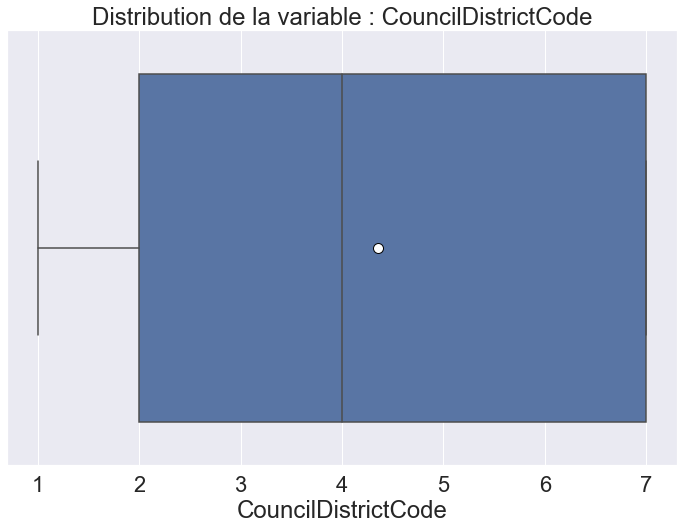

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


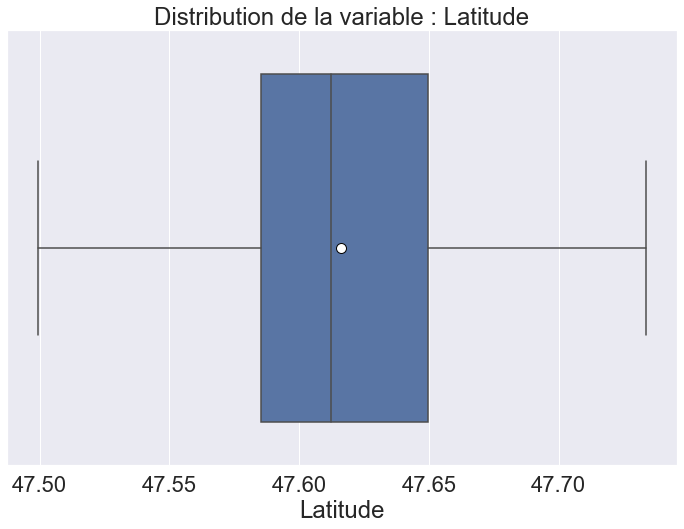

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


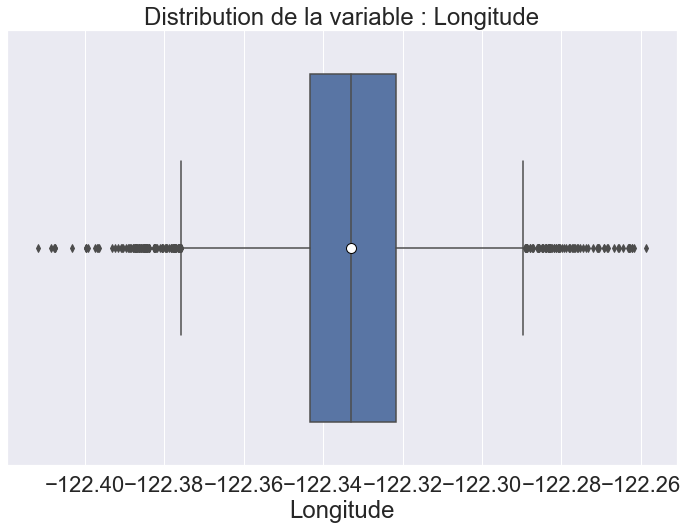

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


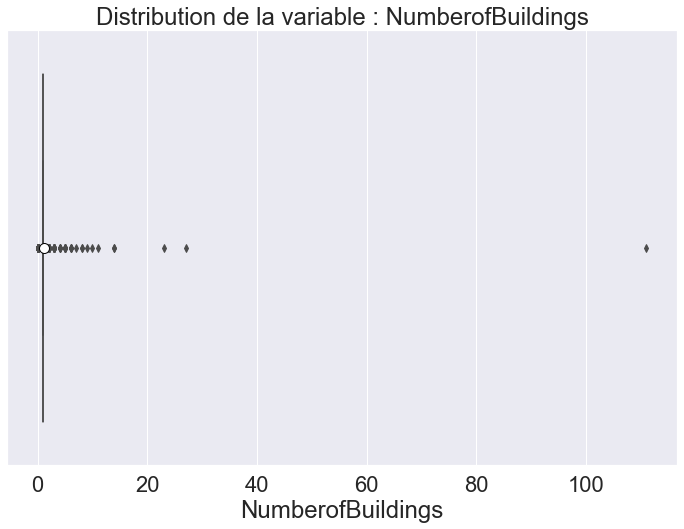

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


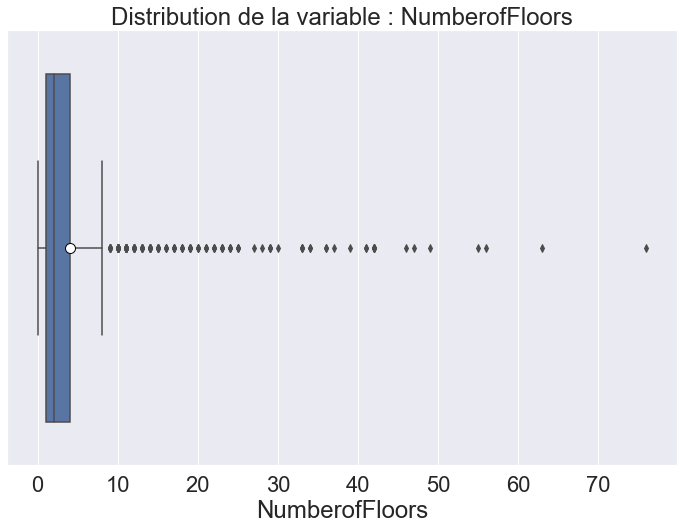

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


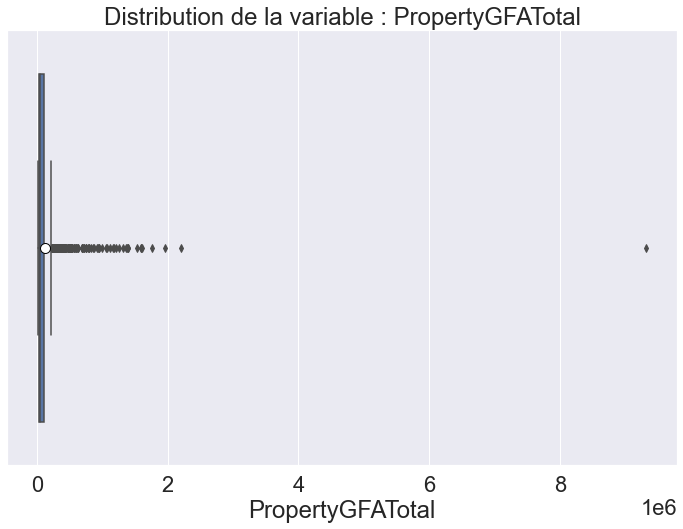

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


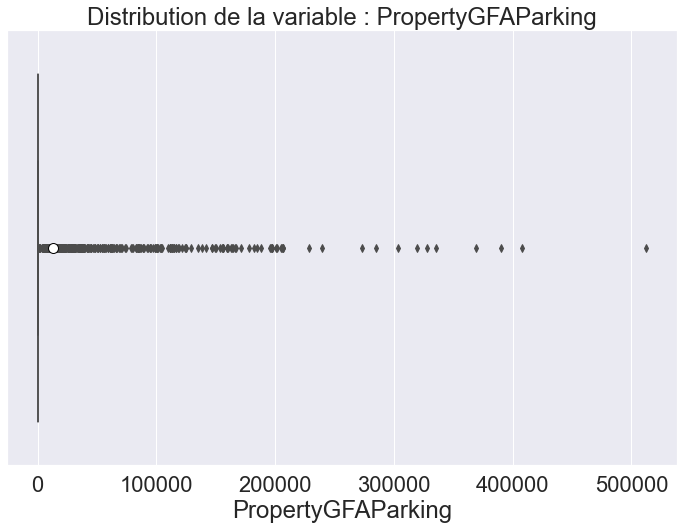

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


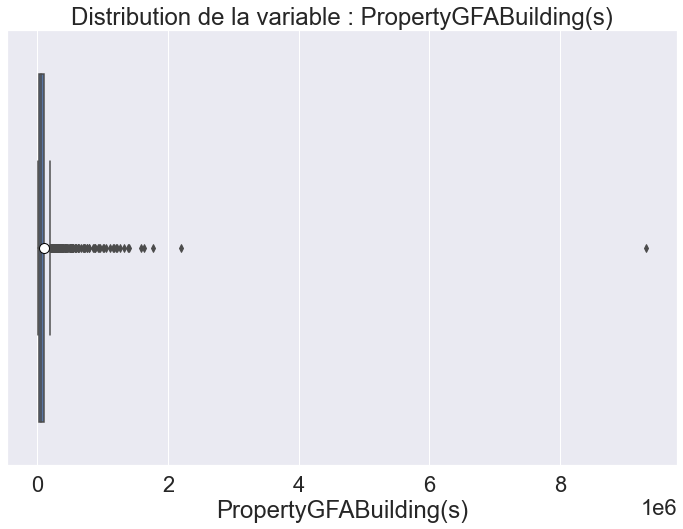

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


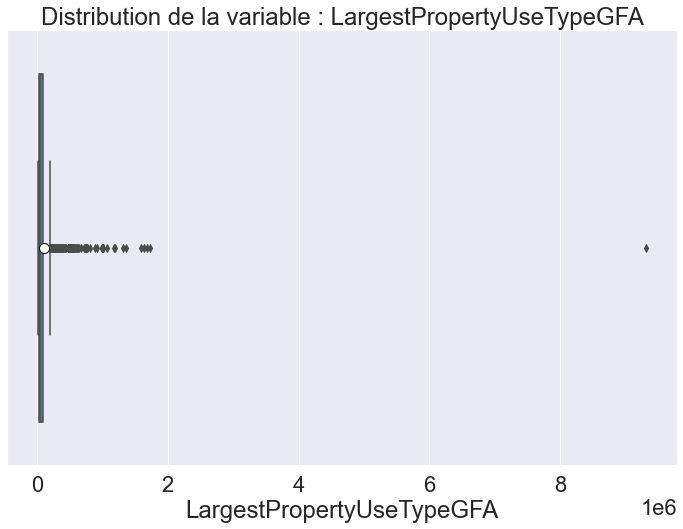

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


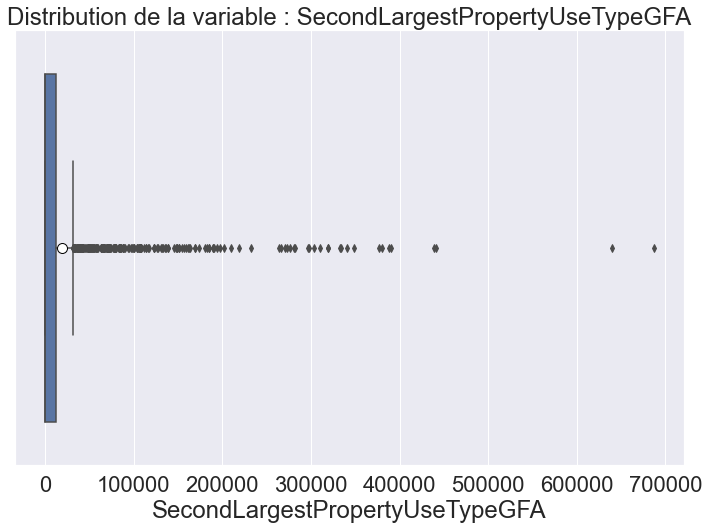

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


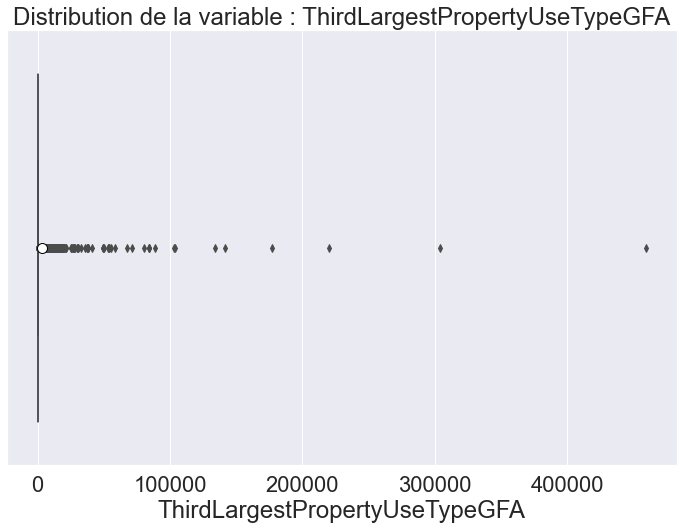

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


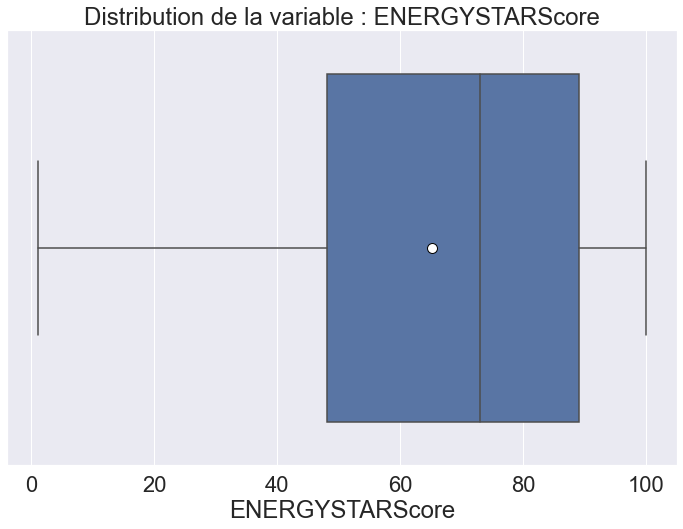

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


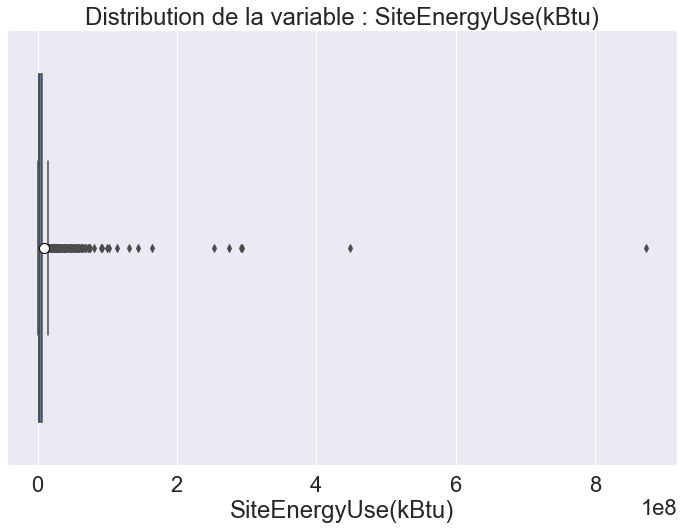

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


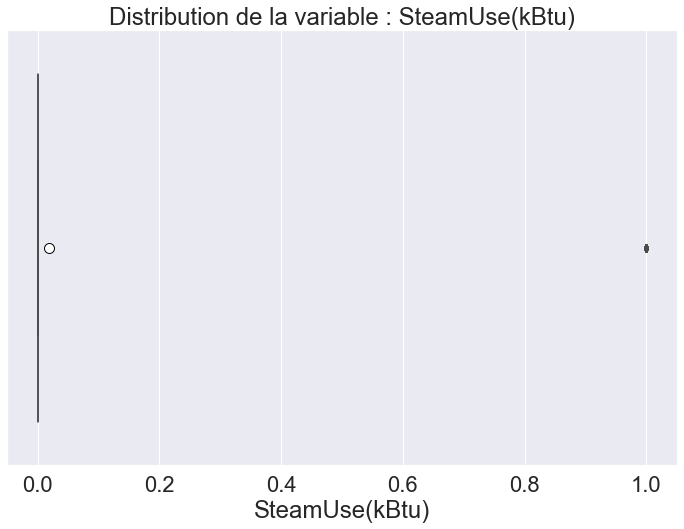

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


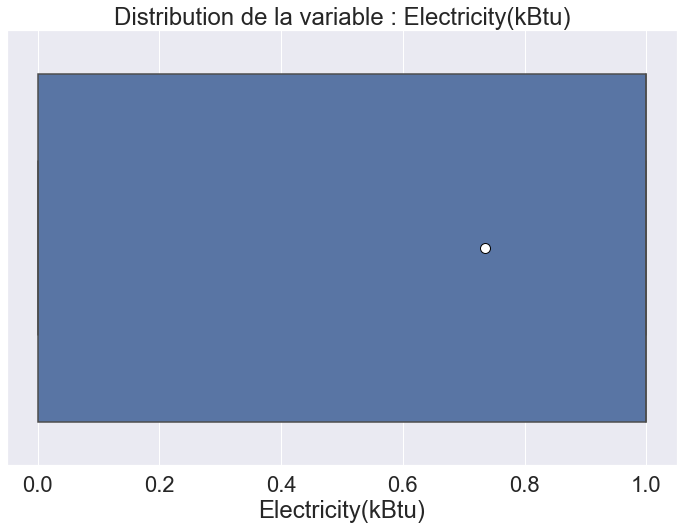

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


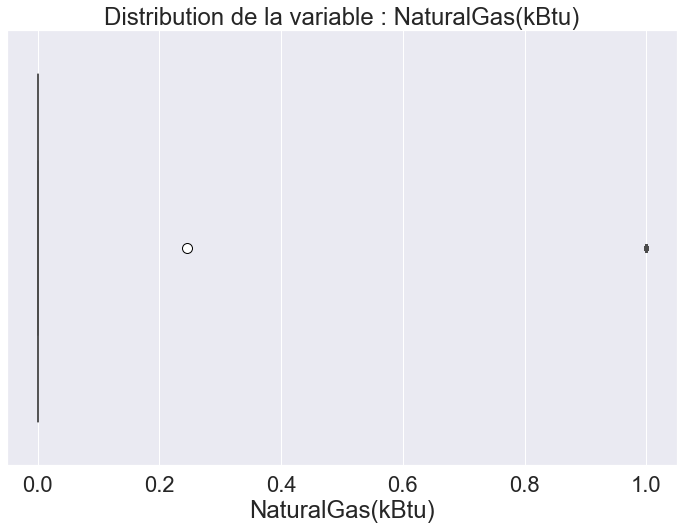

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


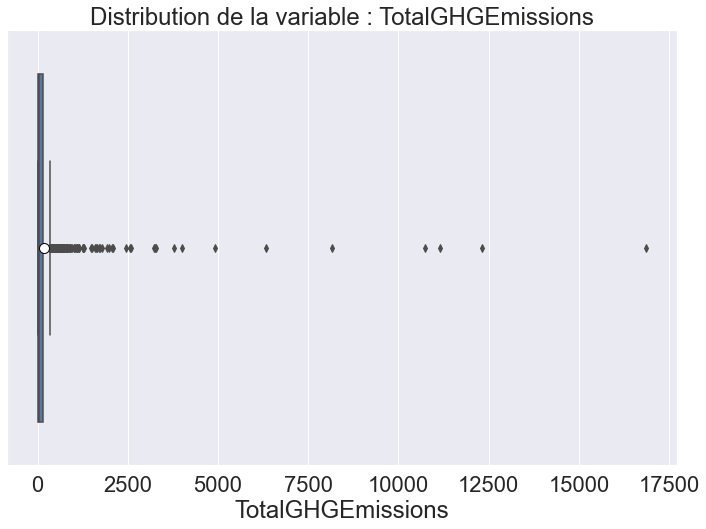

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


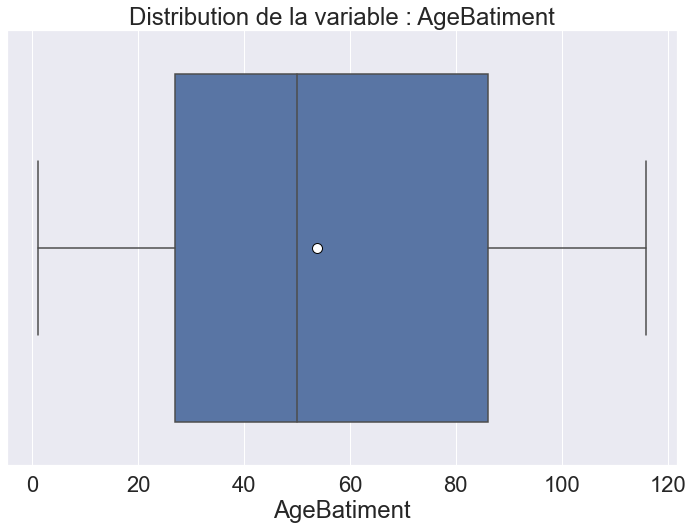

In [79]:
# On regarde ici les variables par boites à moustache

sns.set(font_scale=2)
for column in objet_sup(df):
    plt.figure(figsize = (12,8))
    
    sns.boxplot(df[column], showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    
    plt.title('Distribution de la variable : ' + column)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


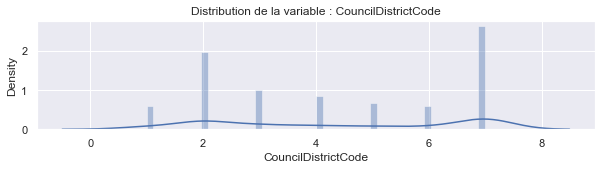

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


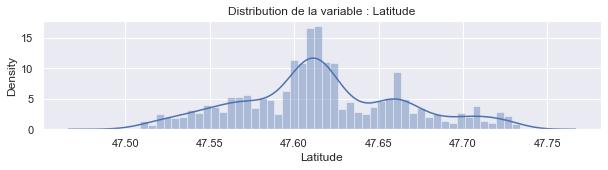

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


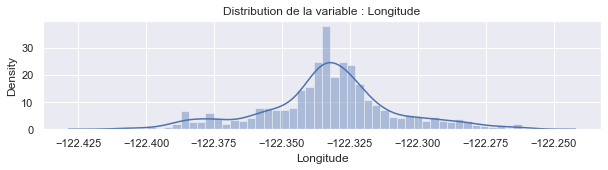

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


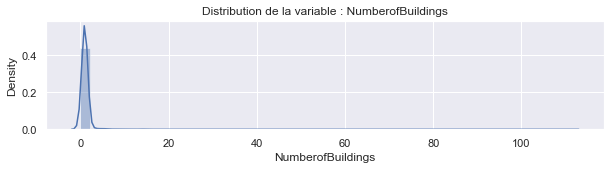

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


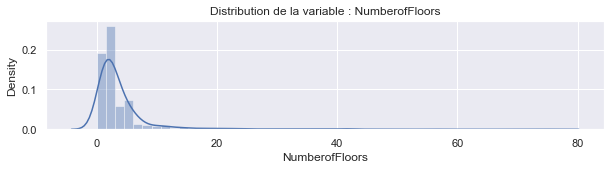

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


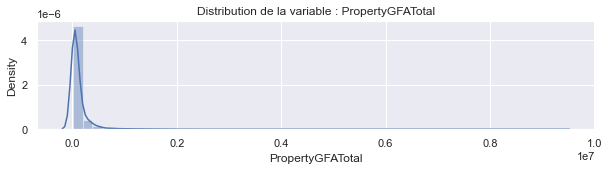

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


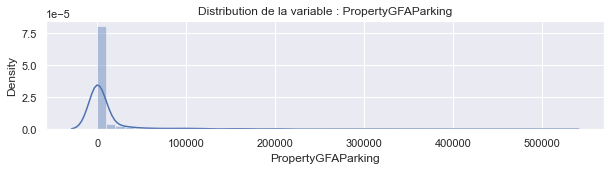

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


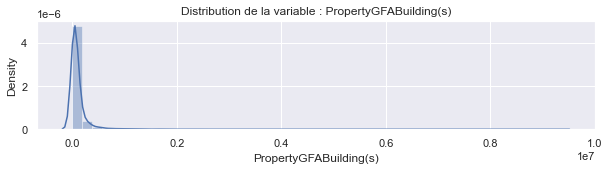

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


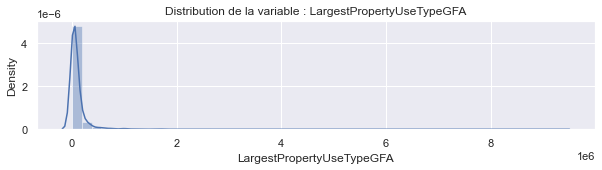

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


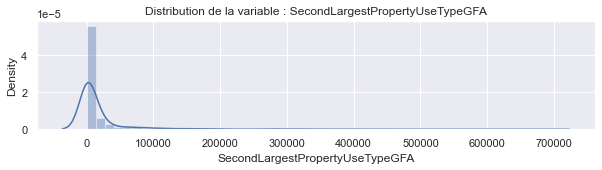

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


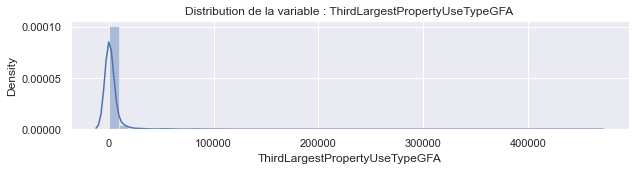

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


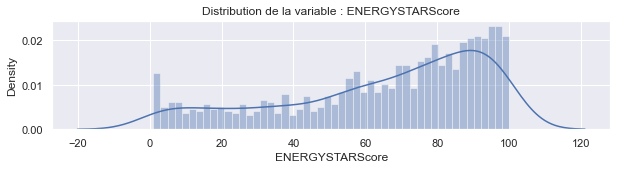

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


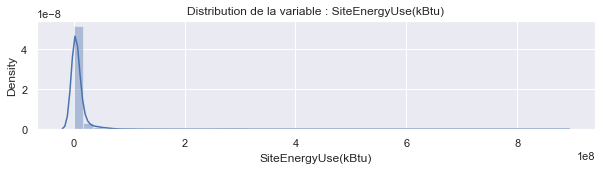

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


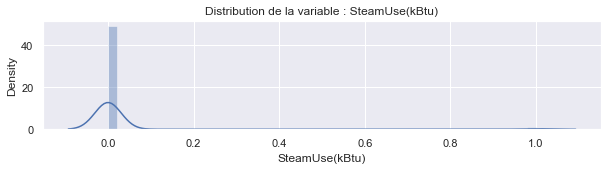

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


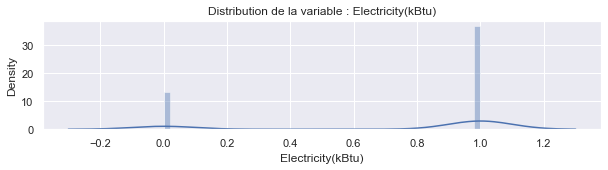

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


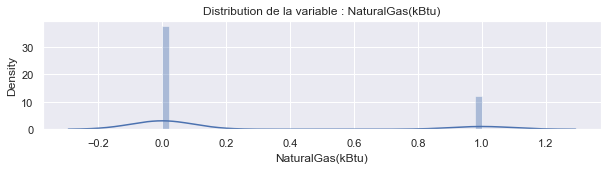

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


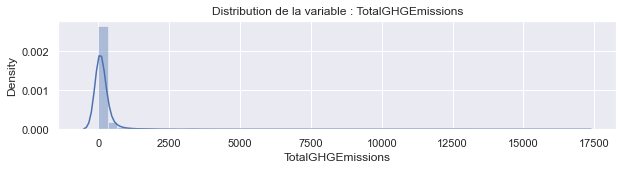

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


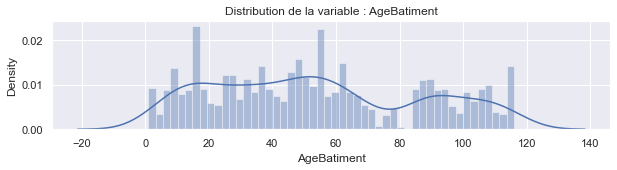

In [80]:
for column in objet_sup(df):

    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(df[column], bins=50)
    plt.title('Distribution de la variable : ' + column)
    plt.xlabel(column)
    plt.show()

In [81]:
df.loc[df['TotalGHGEmissions'] >= 15000]

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment
35,Mixed Use Property,2,greater duwamish,47.53493,-122.31788,1.0,3,494835,0,494835,Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,8.0,448385312.0,0.0,0.0,1.0,Compliant,16870.98,24


## Transformation logarithmique des données target pour changer les ordres de grandeur

In [82]:
# On essaie de choisir la transformation logarithme la plus adaptée à nos données

log_test = np.log(1+df['SiteEnergyUse(kBtu)'])
log_test_2 = np.log2(1+df['SiteEnergyUse(kBtu)'])

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


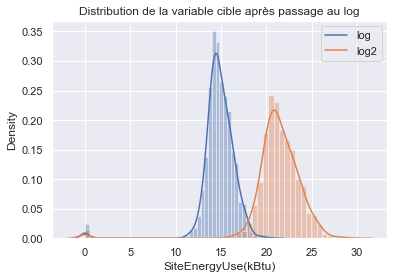

In [83]:
plt.title('Distribution de la variable cible après passage au log')
sns.distplot(log_test)
sns.distplot(log_test_2)

ax = plt.gca()
ax.legend(['log', 'log2'])

On note qu'après passage au log, notre variable cible a une distribution qui se rapproche d'une loi normale, on conservera la transformation log cannonique.

In [84]:
#Création de la variable énergie consommée (log)
df['log_SiteEnergyUse(kBtu)'] = np.log(1+df['SiteEnergyUse(kBtu)']) 
df = df.drop(['SiteEnergyUse(kBtu)'],axis=1)

In [85]:
df.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment,log_SiteEnergyUse(kBtu)
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,60.0,0.0,1.0,0.0,Compliant,249.98,89,15.793246
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.0,0.0,1.0,Compliant,295.86,20,15.942305
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,43.0,0.0,1.0,0.0,Compliant,2089.28,47,18.100297
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,56.0,0.0,1.0,0.0,Compliant,286.43,90,15.731637
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,0.0,0.0,1.0,Compliant,505.01,36,16.466822


## Matrice de corrélation post-choix de variables

In [86]:
df.corr()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,AgeBatiment,log_SiteEnergyUse(kBtu)
CouncilDistrictCode,1.000000,0.528464,-0.334669,-0.016564,0.308479,0.109017,0.193279,0.085313,0.069233,0.161362,0.061116,0.105960,0.065056,0.104227,-0.127313,0.011680,0.051514,0.135147
Latitude,0.528464,1.000000,-0.096807,0.020734,0.001652,0.005351,0.038309,-0.000098,0.005714,-0.020830,-0.047238,0.044292,0.014152,-0.020996,0.017046,-0.000227,-0.062835,0.000513
Longitude,-0.334669,-0.096807,1.000000,0.020977,-0.025576,0.021992,-0.026609,0.026964,0.030087,-0.007342,0.004707,-0.002294,0.010368,-0.024559,0.021891,0.040677,-0.020348,0.018656
NumberofBuildings,-0.016564,0.020734,0.020977,1.000000,-0.024971,0.734955,-0.011507,0.770612,0.796960,0.015726,-0.007464,-0.046010,-0.007898,0.014124,-0.011979,0.418869,0.029993,0.114166
NumberofFloors,0.308479,0.001652,-0.025576,-0.024971,1.000000,0.436769,0.541054,0.376492,0.359437,0.491498,0.252307,0.129116,0.028651,0.136024,-0.148405,0.140773,-0.096308,0.328836
PropertyGFATotal,0.109017,0.005351,0.021992,0.734955,0.436769,1.000000,0.374836,0.990453,0.977667,0.485865,0.251627,0.128882,0.013986,0.097220,-0.104021,0.524314,-0.101583,0.305709
PropertyGFAParking,0.193279,0.038309,-0.026609,-0.011507,0.541054,0.374836,1.000000,0.243456,0.272877,0.471975,0.180826,0.099210,-0.036985,0.149819,-0.141829,0.057512,-0.276512,0.269564
PropertyGFABuilding(s),0.085313,-0.000098,0.026964,0.770612,0.376492,0.990453,0.243456,1.000000,0.982249,0.438127,0.236362,0.122421,0.020131,0.079434,-0.087736,0.539979,-0.065160,0.279747
LargestPropertyUseTypeGFA,0.069233,0.005714,0.030087,0.796960,0.359437,0.977667,0.272877,0.982249,1.000000,0.382518,0.172518,0.115822,0.014380,0.073034,-0.079364,0.572737,-0.068578,0.275753
SecondLargestPropertyUseTypeGFA,0.161362,-0.020830,-0.007342,0.015726,0.491498,0.485865,0.471975,0.438127,0.382518,1.000000,0.528354,0.097911,0.031850,0.103877,-0.116478,0.413409,-0.197500,0.271497


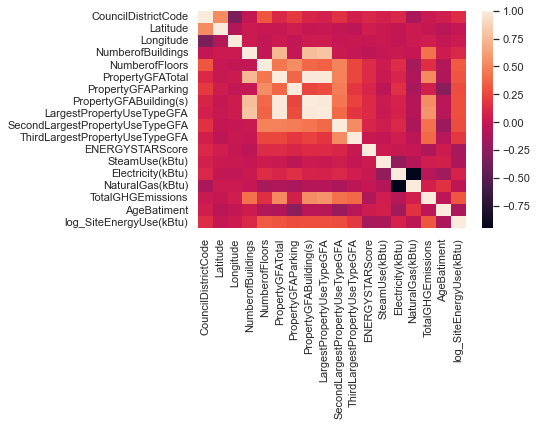

In [87]:
#Visualisation des corrélations par une HeatMap
sns.heatmap(df.corr());

In [88]:
df.shape

(1649, 24)

In [89]:
df.isna().sum()

PrimaryPropertyType                  0
CouncilDistrictCode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    566
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
ComplianceStatus                     0
TotalGHGEmissions                    0
AgeBatiment                          0
log_SiteEnergyUse(kBtu)              0
dtype: int64

## Export du jeu de données nettoyé

In [90]:
# Exportation du jeu de données nettoyé pour les analyses
df.to_csv('projet4_propre.csv', index = False, header=True)